## SubductionConvergence class usage examples

In [1]:
import sys
sys.path.insert(1, r'C:\Users\taschaap\Documents\pygplates_rev30_python38_win64')
sys.path.insert(1, r"C:\Users\taschaap\Documents\Python Scripts\GPlatesReconstructionModel-master\GPlatesReconstructionModel-master")
import pygplates
import pandas as pd
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

print(pygplates.__version__)

from gprm import ReconstructionModel, SubductionConvergence

2.2.0.30


C:\Users\taschaap\Documents\Python Scripts\GPlatesReconstructionModel-master\GPlatesReconstructionModel-master\gprm\GPlatesReconstructionModel.py:52: UserWarning: cartopy plotting options not available
  warnings.warn('cartopy plotting options not available')
C:\Users\taschaap\Documents\Python Scripts\GPlatesReconstructionModel-master\GPlatesReconstructionModel-master\gprm\GPlatesReconstructionModel.py:56: UserWarning: web service options not available
  warnings.warn('web service options not available')


In [2]:
# Build an object describing a reconstruction model

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model(r"C:\Program Files\GPlates\GPlates 2.2.0\SampleData\FeatureCollections\Rotations\Matthews_etal_GPC_2016_410-0Ma_GK07.rot")
M2016.add_static_polygons(r"C:\Program Files\GPlates\GPlates 2.2.0\SampleData\FeatureCollections\StaticPolygons\Muller_etal_AREPS_2016_StaticPolygons.gpmlz")
M2016.add_dynamic_polygons(r"C:\Program Files\GPlates\GPlates 2.2.0\SampleData\FeatureCollections\DynamicPolygons\Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz")
M2016.add_dynamic_polygons(r"C:\Program Files\GPlates\GPlates 2.2.0\SampleData\FeatureCollections\DynamicPolygons\Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz")


In [11]:
# Build an object describing a reconstruction model

S2020 = ReconstructionModel('Schaap++2020')
S2020.add_rotation_model(r"C:\Users\taschaap\Desktop\PhD\Data\Working models\2020\Rotation models\Phanerozoic_EarthByte_V3.grot")
S2020.add_rotation_model(r"C:\Users\taschaap\Desktop\PhD\Data\Working models\2020\Rotation models\Orocline_July20.grot")
S2020.add_dynamic_polygons(r"C:\Users\taschaap\Desktop\PhD\Data\Working models\2020\sub-zones1.gpml")

<Figure size 864x360 with 0 Axes>

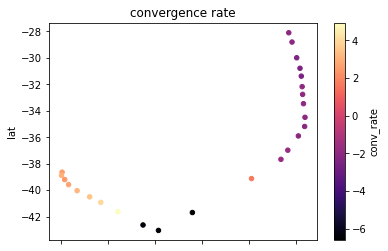

<Figure size 864x360 with 0 Axes>

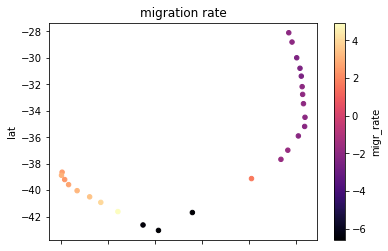

In [12]:
# compute the subduction zone kinematics for a single time snapshot
# results are returned in a 'SubductionConvergence' class object

subduction_kinematics_400Ma = SubductionConvergence(S2020,400.,threshold_sampling_distance_radians=5., anchor_plate_id = 801)

subduction_kinematics_400Ma.plot('cr')
subduction_kinematics_400Ma.plot('mr')


<Figure size 864x360 with 0 Axes>

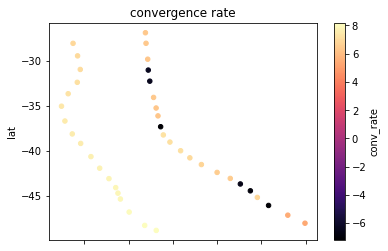

<Figure size 864x360 with 0 Axes>

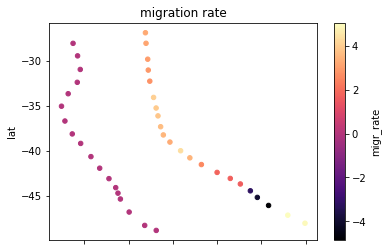

In [13]:
# compute the subduction zone kinematics for a single time snapshot
# results are returned in a 'SubductionConvergence' class object

subduction_kinematics_400Ma = SubductionConvergence(S2020,510.,threshold_sampling_distance_radians=5., anchor_plate_id = 801)

subduction_kinematics_400Ma.plot('cr')
subduction_kinematics_400Ma.plot('mr')


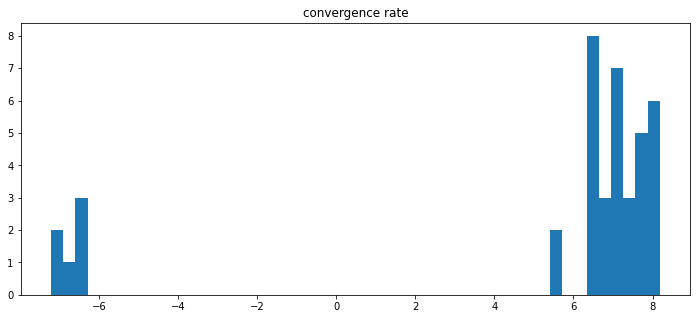

In [14]:
subduction_kinematics_400Ma.hist('cr')

In [15]:
subduction_kinematics = SubductionConvergence(S2020, np.arange(380,521,1),
                                              threshold_sampling_distance_radians=5.,
                                              velocity_delta_time=1., anchor_plate_id = 801)


C:\Users\taschaap\Anaconda3\envs\pygmt\lib\site-packages\ptt\subduction_convergence.py:279: RuntimeWarning: Unable to find the overriding and subducting plates of the subducting sub-segment "Tabberabberan_subduction" at 380Ma.
    Either the subduction polarity is not properly set or there are not exactly 2 topologies sharing the sub-segment.
    Ignoring current sub-segment.
  warnings.warn('Unable to find the overriding and subducting plates of the subducting sub-segment "{0}" at {1}Ma.\n'
C:\Users\taschaap\Anaconda3\envs\pygmt\lib\site-packages\ptt\subduction_convergence.py:279: RuntimeWarning: Unable to find the overriding and subducting plates of the subducting sub-segment "Tabberabberan_subduction" at 381Ma.
    Either the subduction polarity is not properly set or there are not exactly 2 topologies sharing the sub-segment.
    Ignoring current sub-segment.
  warnings.warn('Unable to find the overriding and subducting plates of the subducting sub-segment "{0}" at {1}Ma.\n'
C:\Use

C:\Users\taschaap\Anaconda3\envs\pygmt\lib\site-packages\ptt\subduction_convergence.py:279: RuntimeWarning: Unable to find the overriding and subducting plates of the subducting sub-segment "Benambran_east-dipping" at 440Ma.
    Either the subduction polarity is not properly set or there are not exactly 2 topologies sharing the sub-segment.
    Ignoring current sub-segment.
  warnings.warn('Unable to find the overriding and subducting plates of the subducting sub-segment "{0}" at {1}Ma.\n'
C:\Users\taschaap\Anaconda3\envs\pygmt\lib\site-packages\ptt\subduction_convergence.py:279: RuntimeWarning: Unable to find the overriding and subducting plates of the subducting sub-segment "Benambran_east-dipping" at 441Ma.
    Either the subduction polarity is not properly set or there are not exactly 2 topologies sharing the sub-segment.
    Ignoring current sub-segment.
  warnings.warn('Unable to find the overriding and subducting plates of the subducting sub-segment "{0}" at {1}Ma.\n'
C:\Users\t

<Figure size 864x360 with 0 Axes>

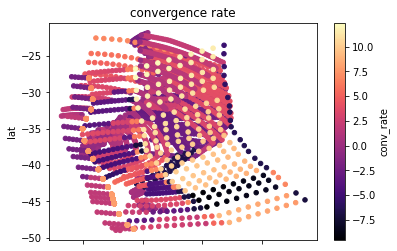

<Figure size 864x360 with 0 Axes>

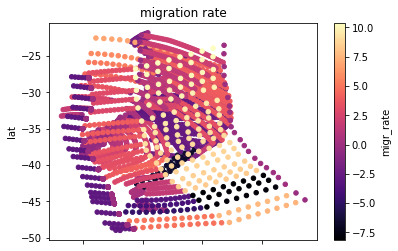

In [16]:
subduction_kinematics.plot('cr')
subduction_kinematics.plot('mr')



In [17]:

mr = np.asarray(subduction_kinematics.df['migr_rate'])
mo = np.asarray(subduction_kinematics.df['migr_obliq'])
subduction_kinematics.df['ortho_migr_rate'] = pd.Series(mr*np.sin(np.radians(np.abs(mo))), index=subduction_kinematics.df.index)

cr = np.asarray(subduction_kinematics.df['conv_rate'])
co = np.asarray(subduction_kinematics.df['conv_obliq'])
subduction_kinematics.df['ortho_conv_rate'] = pd.Series(cr*np.abs(np.cos(np.radians(co))), index=subduction_kinematics.df.index)



In [31]:
subduction_kinematics.df#.head()

,lon,lat,conv_rate,conv_obliq,migr_rate,migr_obliq,arc_length,arc_azimuth,subducting_plate,overriding_plate,time,ortho_migr_rate,ortho_conv_rate
0,149.691236,-45.525497,-0.389297,129.866928,-0.389297,-50.133072,1.106505,253.677367,801,2310,380,-0.298799,-0.249542
1,149.247754,-44.443395,0.489592,-56.236026,0.489592,123.763974,1.146780,73.990886,801,2305,380,0.407015,0.272102
2,149.067636,-43.774194,0.603357,-69.740804,0.603357,110.259196,0.242402,103.518221,801,2305,380,0.566031,0.208923
3,149.546063,-41.921371,0.938333,-36.143468,0.938333,143.856532,3.529318,100.376888,801,2305,380,0.553438,0.757744
4,150.357273,-38.446839,-1.922541,-176.451622,-1.922541,3.548378,3.529318,279.853212,801,2304,380,-0.118989,-1.918855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,145.264296,-33.651476,7.313333,46.613151,0.000000,0.000000,1.608551,286.215624,0,4001,520,0.000000,5.023680
36,145.675977,-32.383758,7.187353,49.965124,0.000000,0.000000,1.019670,283.746416,0,4001,520,0.000000,4.623292
37,145.810529,-30.956609,7.082840,65.507800,0.000000,0.000000,1.863726,269.575560,0,4001,520,0.000000,2.936328
38,145.689729,-29.448506,7.006800,76.456314,0.000000,0.000000,1.169067,260.379464,0,4001,520,0.000000,1.640899


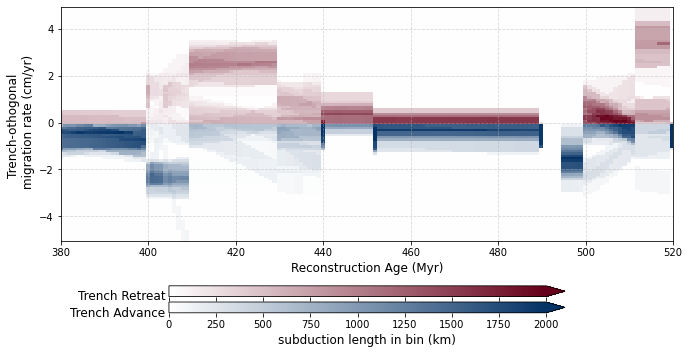

In [36]:
# Example of a time-dependent histogram similar to those used in Williams++ EPSL 2015; Müller et al 2019

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

df = subduction_kinematics.df[df['ortho_migr_rate']!=0]

my_red = (0.4,0.0,0.1)
my_blue = (0.02,0.2,0.4)
blue_clear_red = LinearSegmentedColormap.from_list("", [my_blue, 'white', my_red])

MinTime = 380.
MaxTime = 520. 
TimeStep = 1.
VMIN = -2000.#15000
VMAX = 2000.


length_of_one_arc_degree = (np.pi/180.)*pygplates.Earth.mean_radius_in_kms


fig = plt.figure(figsize=(10,5))
ax1 = fig.add_axes([0.1, 0.3, 0.85, 0.65])

TimeStepList = np.arange(MinTime,MaxTime+TimeStep,TimeStep)
VelBins = np.arange(-5,5,0.1) #-15,15,1.0
histCat = np.zeros((len(TimeStepList),len(VelBins)))
count = 0
for TIME in TimeStepList:
    subset = df[(df['time']>=TIME) & (df['time']<(TIME+TimeStep))]
        
    tmp = []
    for Bin in VelBins:
        subset_bin = subset[(subset['ortho_migr_rate']>=Bin) & (subset['ortho_migr_rate']<(Bin+1.0))]
        tmp.append(subset_bin['arc_length'].sum()*length_of_one_arc_degree/TimeStep)
    histCat[count,:] = tmp
    
    count=count+1

histCat[:,0:int(len(VelBins)/2)] = histCat[:,0:int(len(VelBins)/2)]*-1

ax1.pcolormesh(TimeStepList, VelBins, histCat.T, cmap=blue_clear_red, vmin=VMIN, vmax=VMAX, shading='auto')
ax1.set_xlim([MinTime,MaxTime])
plt.ylabel('Trench-othogonal \n migration rate (cm/yr)', fontsize=12)
plt.xlabel('Reconstruction Age (Myr)', fontsize=12)
plt.grid(linestyle='--',alpha=0.5)

# Colorbars - make spearate scales for trench advance and trench retreat
ax2 = fig.add_axes([0.25, 0.145, 0.55, 0.03])
red_clear = LinearSegmentedColormap.from_list('',['white',my_red])
norm = mpl.colors.Normalize(vmin=0, vmax=VMAX)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=red_clear,
                                   norm=norm,
                                   extend='max',
                                   orientation='horizontal')
cb1.ax.set_xticklabels([])
plt.text(1.07,0.5,'Trench Retreat ', verticalalignment='center',horizontalalignment='right',fontsize=12)

ax3 = fig.add_axes([0.25, 0.1, 0.55, 0.03])

blue_clear = LinearSegmentedColormap.from_list('',['white', my_blue])
norm = mpl.colors.Normalize(vmin=0, vmax=VMAX)
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=blue_clear,
                                   norm=norm,
                                   extend='max',
                                   orientation='horizontal')
plt.text(1.07,0.5,'Trench Advance ', verticalalignment='center',horizontalalignment='right', fontsize=12)

cb2.set_label('subduction length in bin (km)',fontsize=12)
plt.savefig(r"C:\Users\taschaap\Documents\Python Scripts\Plots\migration-vs-time.svg")
plt.show()
